In [160]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
words = open("names.txt").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [162]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [163]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for c in w + '.':
            ix = stoi[c]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    return torch.tensor(X), torch.tensor(Y)

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
train_words = words[:n1]
val_words = words[n1:n2]
test_words = words[n2:]
Xtr, Ytr = build_dataset(train_words)
Xdev, Ydev = build_dataset(val_words)
Xte, Yte = build_dataset(test_words)
print(len(Xtr), len(Xdev), len(Xte))

182625 22655 22866


In [164]:
gen = torch.Generator().manual_seed(2147483647)

In [165]:
C = torch.randn((27, 10), generator=gen)


In [166]:
w1 = torch.randn((30, 200), generator=gen)
b1 = torch.randn(200, generator=gen)
w2 = torch.randn((200, 27), generator=gen)
b2 = torch.randn(27, generator=gen)

In [167]:
parameters = [C, w1, b1, w2, b2]

In [168]:
for p in parameters:
    p.requires_grad = True

In [169]:
stepi = []
lossi = []


In [178]:

for i in range(50000):

    ix = torch.randint(0, Xtr.shape[0], (32,))
    Xb, Yb = Xtr[ix], Ytr[ix]

    embs = C[Xb]
    h = torch.tanh(embs.view(-1, 30) @ w1 + b1)
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, Yb)
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.01 * p.grad

    stepi.append(i)
    lossi.append(loss.log10().item())
    

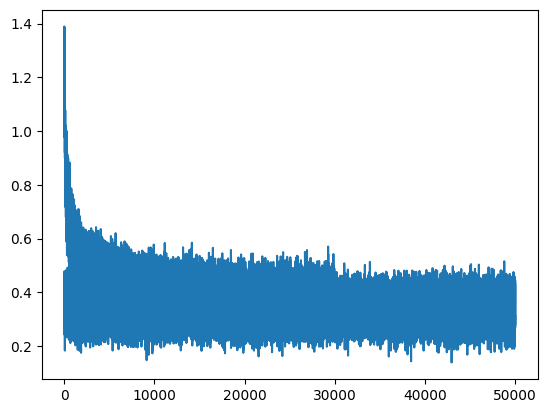

In [179]:
plt.plot(stepi, lossi)

In [182]:
embs = C[Xdev]
h = torch.tanh(embs.view(-1, 30) @ w1 + b1)
logits = h @ w2 + b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.2243993282318115


In [181]:
embs = C[Xtr]
h = torch.tanh(embs.view(-1, 30) @ w1 + b1)
logits = h @ w2 + b2
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.1962852478027344


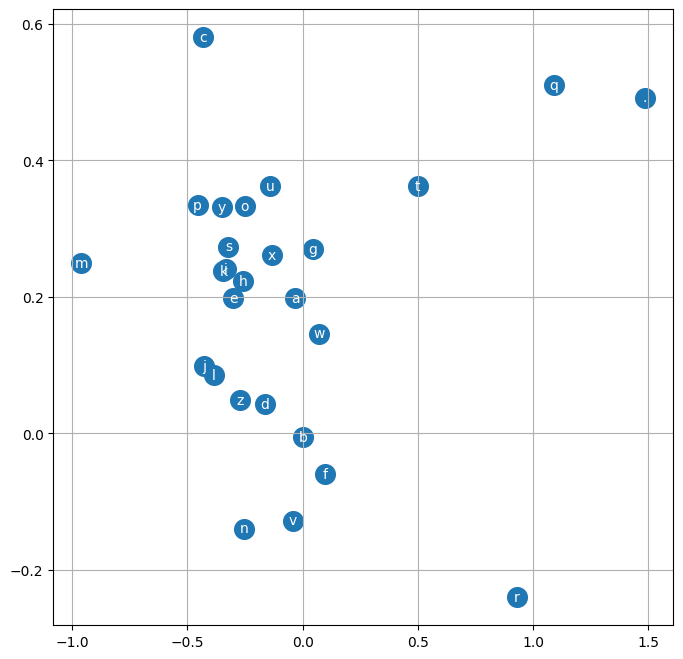

In [183]:
plt.figure(figsize=(8,8)) 
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(27):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')
plt.show()